# Unsupervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of unsupervised learning model evaluation.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
plt.rcParams['figure.figsize'] = (22,12)

In [4]:
from sklearn import datasets

data = datasets.load_wine()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.Series(data["target"])

## 1. Train a KMeans clustering model on the data set using 8 clusters and compute the silhouette score for the model.

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [8]:
km_c = KMeans(n_clusters=8).fit(X)
silhouette_score(X, km_c.labels_)

0.5486213604076143

## 2. Train a KMeans clustering model on the data set using 5 clusters and compute the silhouette score for the model.

In [10]:
km_c = KMeans(n_clusters=5).fit(X)
silhouette_score(X, km_c.labels_)

0.5489993239795691

## 3. Train a KMeans clustering model on the data set using 3 clusters and compute the silhouette score for the model.

In [9]:
km_c = KMeans(n_clusters=3).fit(X)
silhouette_score(X, km_c.labels_)

0.5711381937868844

## 4. Use elbow curve visualizations to see if you can determine the best number of clusters to use.

The Yellowbrick library has 3 metrics that you can plot using the `metric` parameter:

- **distortion**: mean sum of squared distances to centers
- **silhouette**: mean ratio of intra-cluster and nearest-cluster distance
- **calinski_harabaz**: ratio of within to between cluster dispersion

In [11]:
from yellowbrick.cluster import KElbowVisualizer

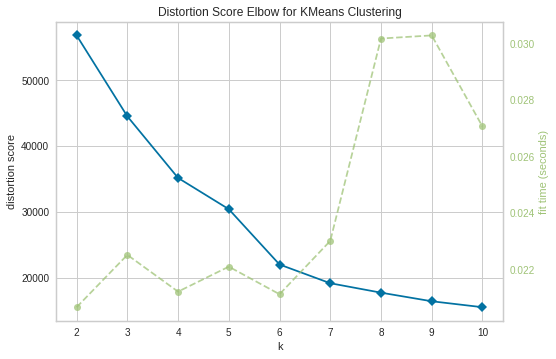

In [15]:
visualizer = KElbowVisualizer(km_c)
visualizer.fit(X)
visualizer.poof()

## 5. Try performing the same elbow tests with an AgglomerativeClustering model and compare the results you get to the KMeans results.

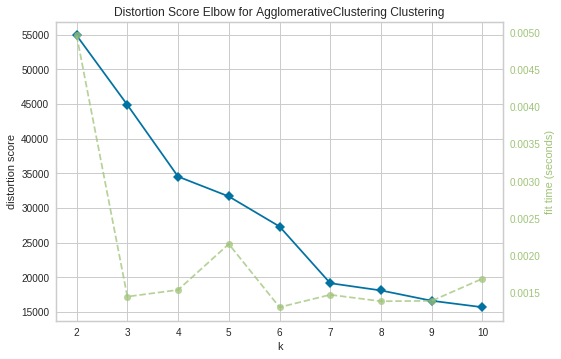

In [16]:
from sklearn.cluster import AgglomerativeClustering

visualizer = KElbowVisualizer(AgglomerativeClustering())
visualizer.fit(X)
visualizer.poof()

## 6. Create and plot a scatter matrix showing how the clusters are grouped across all the different combinations of variables in the data.

Use the model and number of clusters that returned the best result above.

In [20]:
ac_c = AgglomerativeClustering(n_clusters=9)
ac_c.fit(X);

In [22]:
X['labels'] = ac_c.labels_

/home/xhoan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/xhoan/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


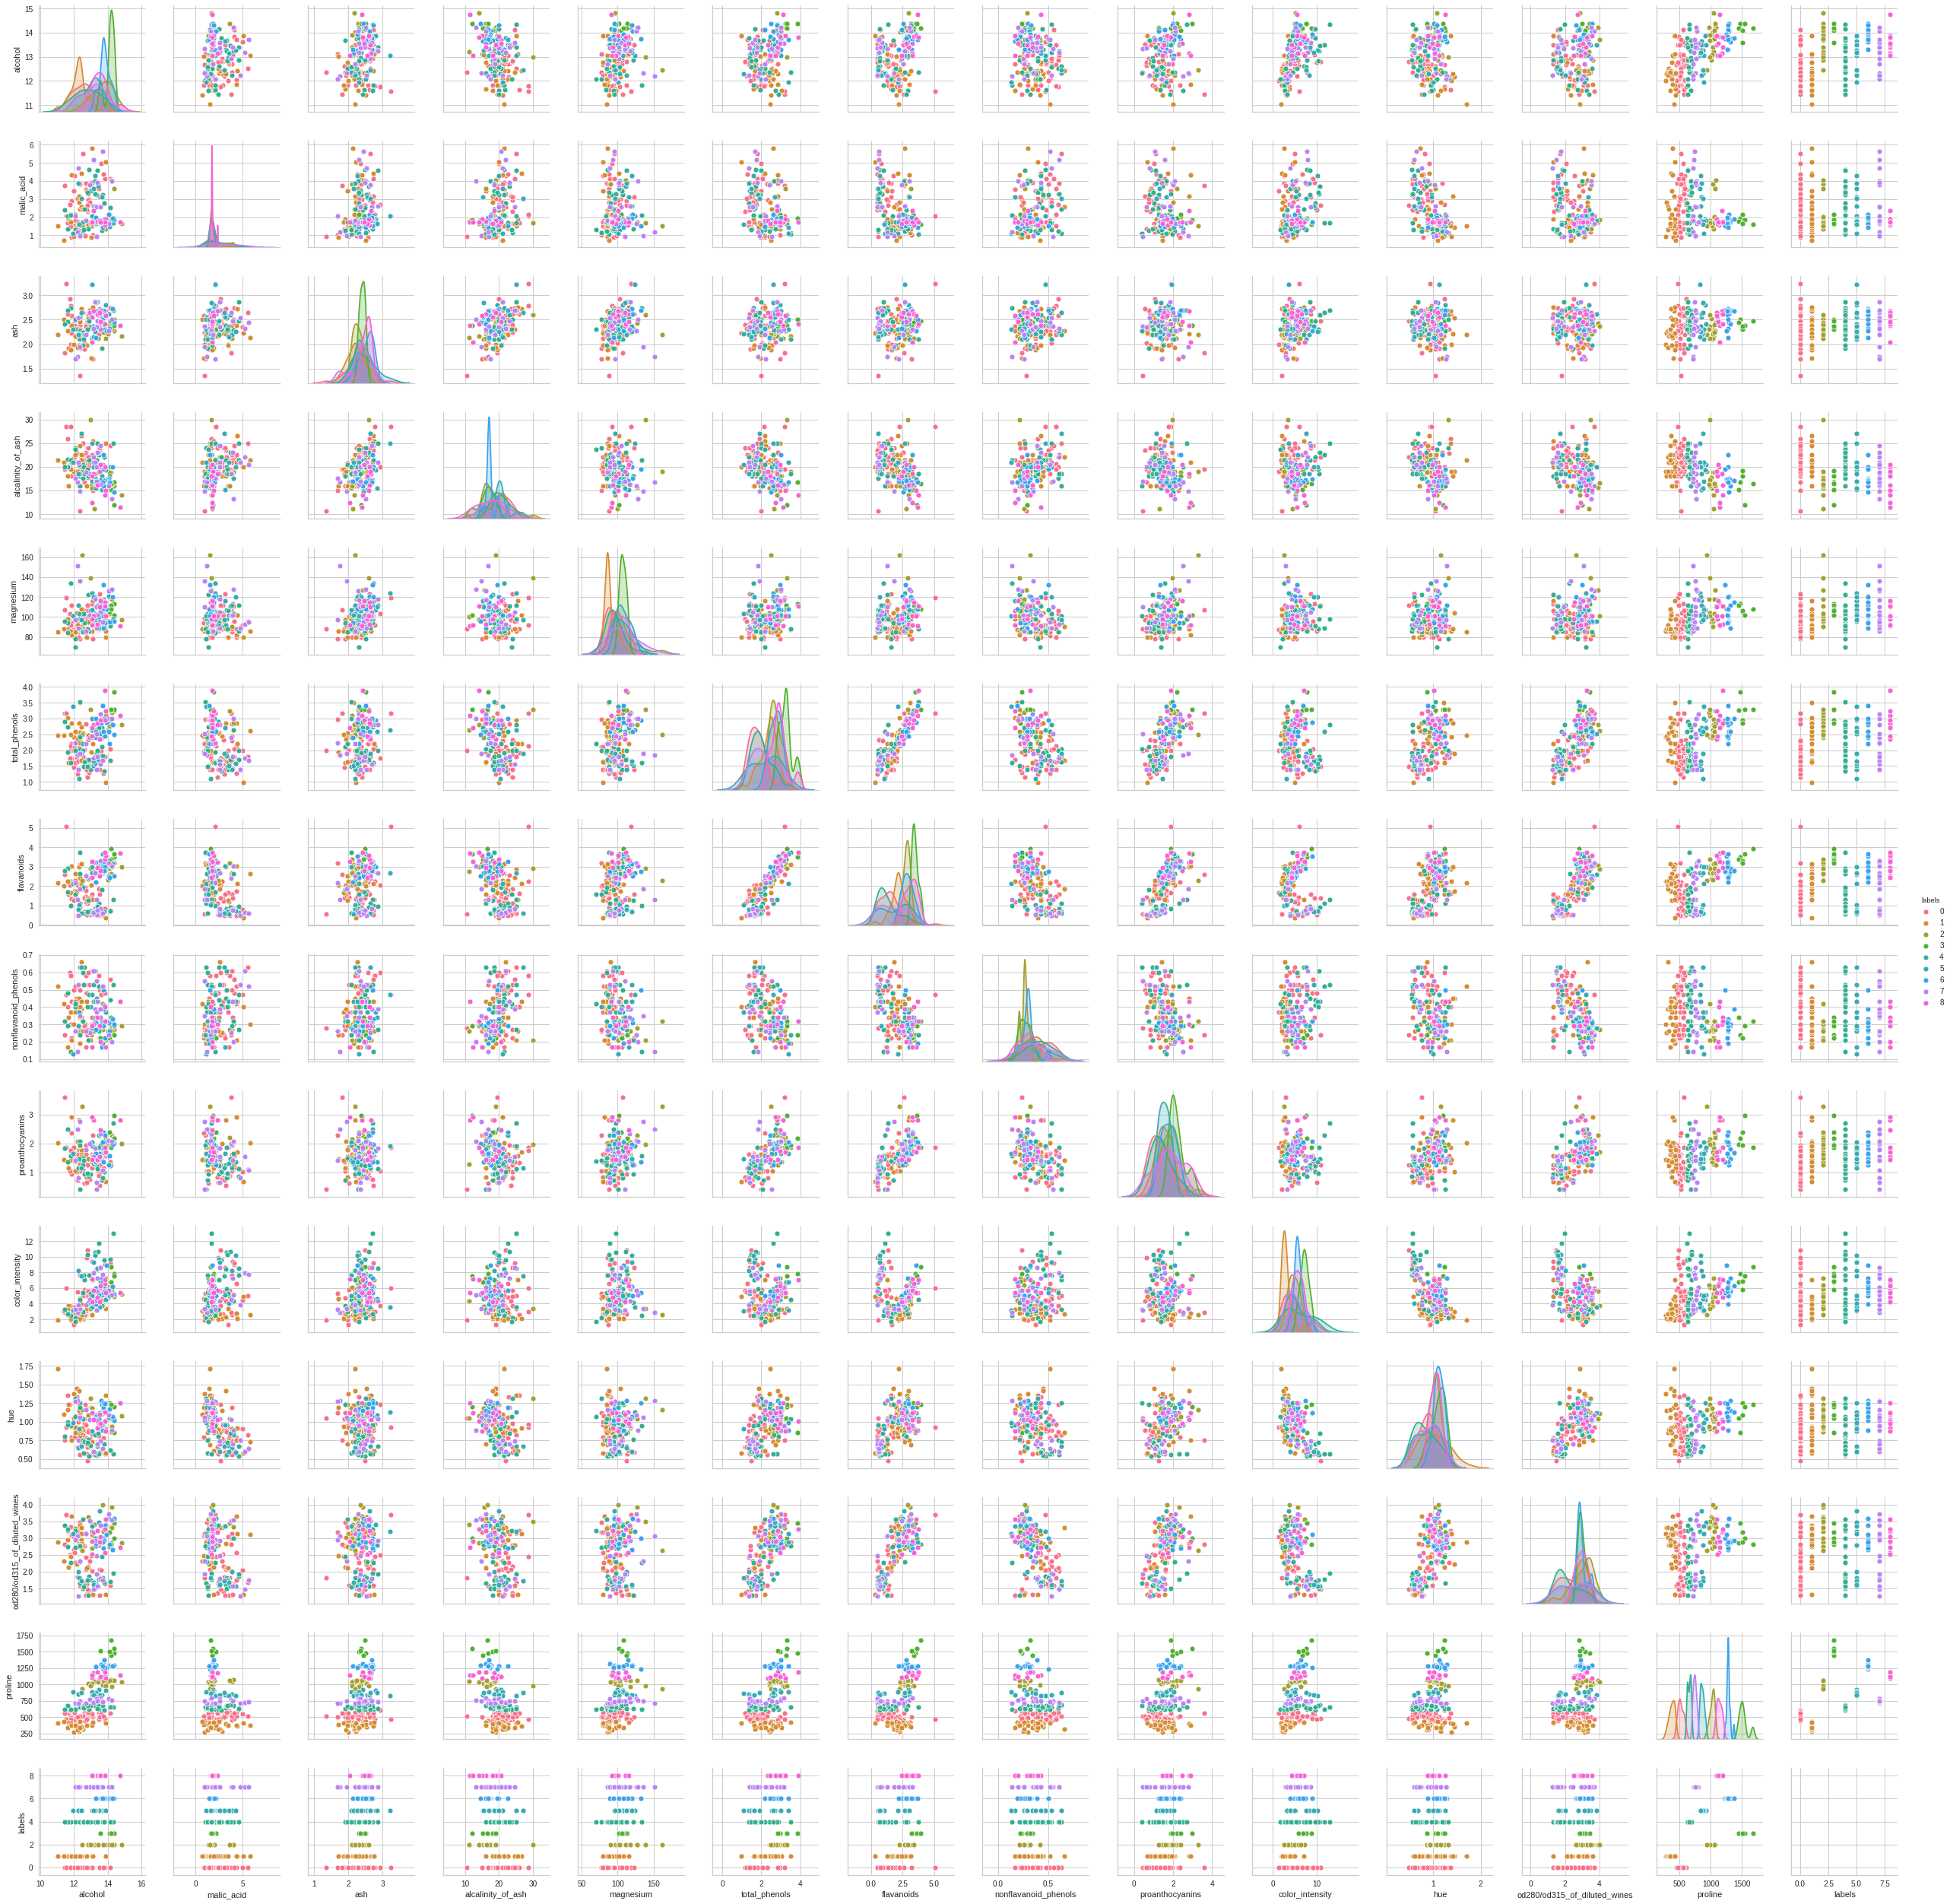

In [26]:
sns.pairplot(X, hue='labels');

## 7. Apply a PCA transform and plot the first two principle components with the plot point colors determined by cluster.

In [27]:
from sklearn.decomposition import PCA

In [28]:
pca = PCA().fit(X.drop(columns='labels'))

In [33]:
X_pca = pca.transform(X.drop(columns='labels'))

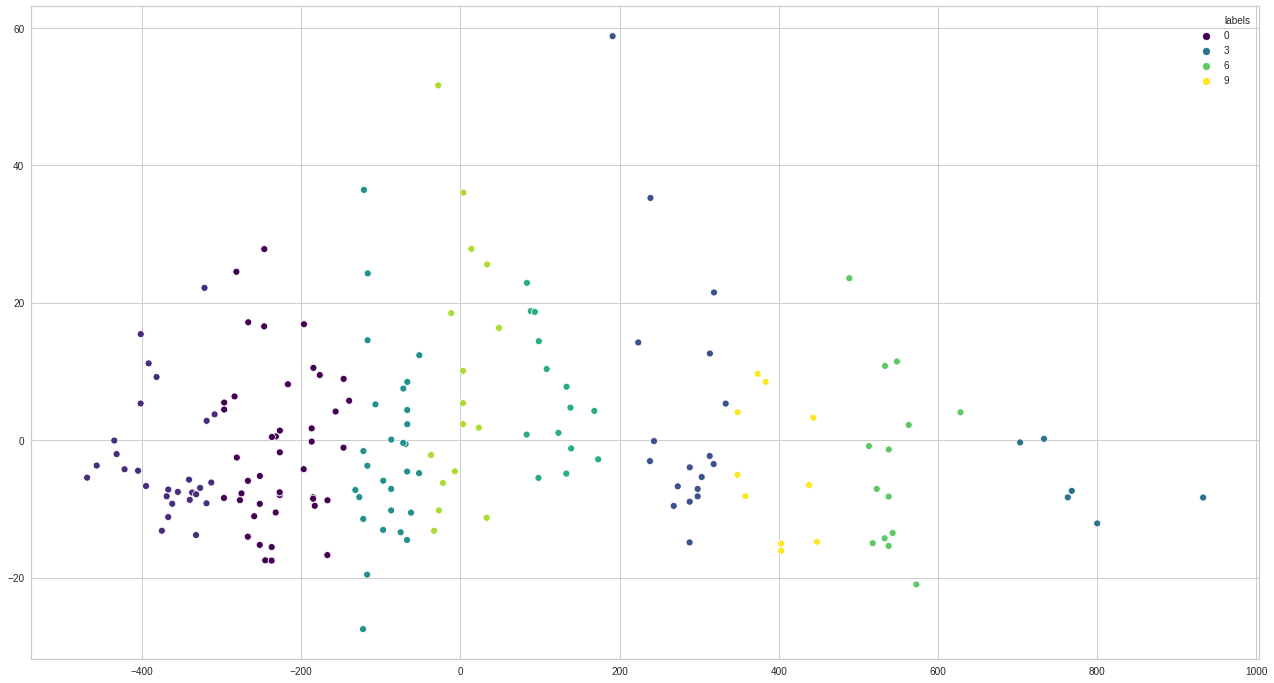

In [39]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=X['labels'], palette='viridis');

## 8. Generate a series of t-SNE plots showing the clusters at a variety of perplexities.

In [42]:
from sklearn.manifold import TSNE

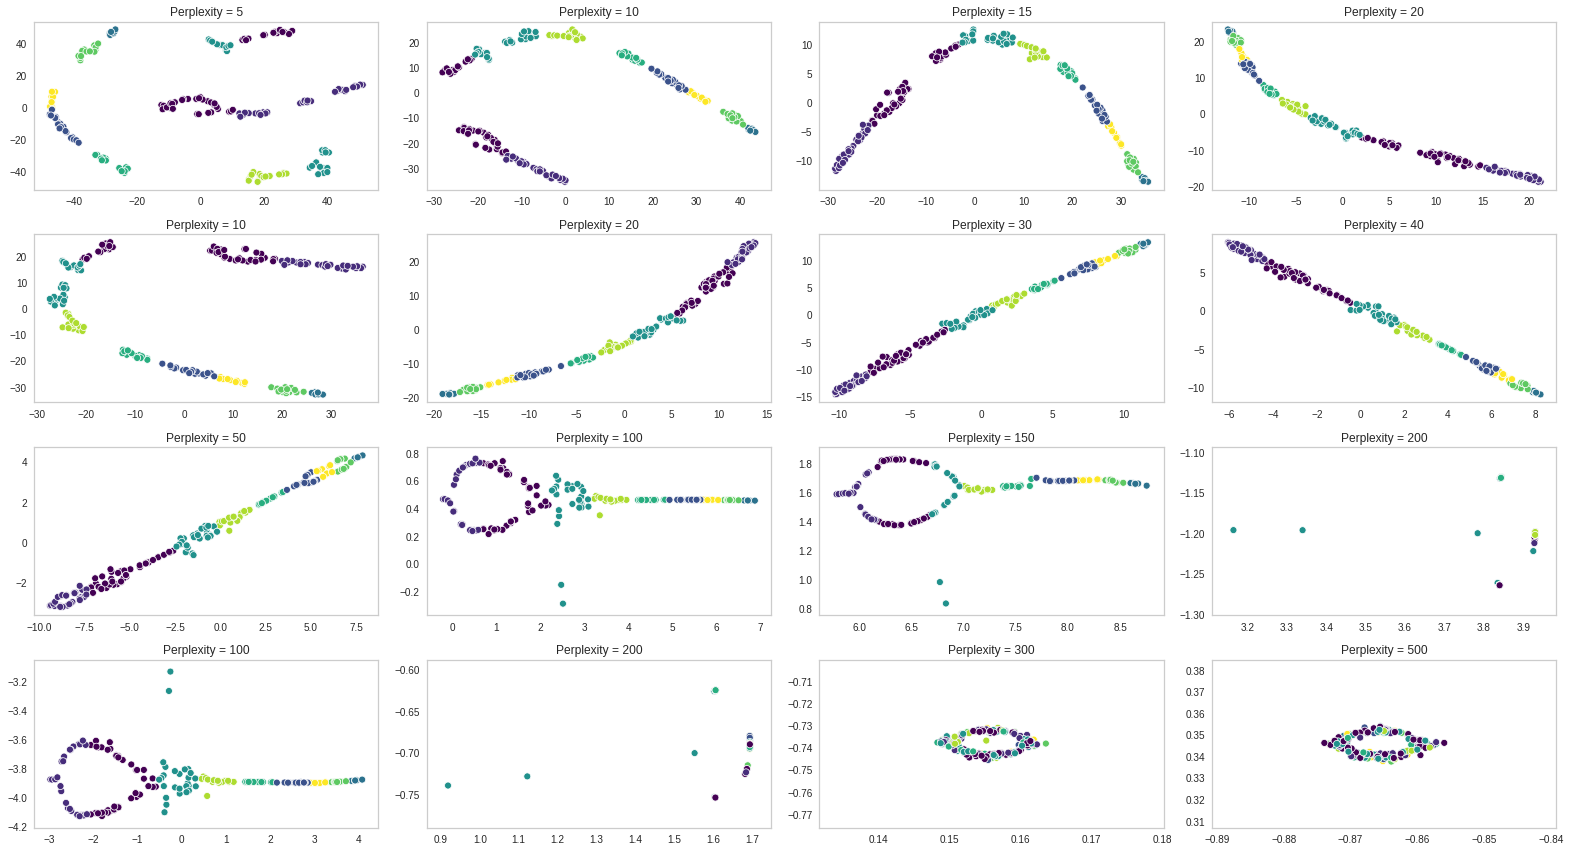

In [54]:
fig, axes = plt.subplots(4,4)

per = [[5,10,15,20],[10,20,30,40],[50,100,150,200],[100,200,300,500]]

for i in range(4):
    for j in range(4):
        p = per[i][j]
        tsne = TSNE(perplexity=p)
        X_tsne = tsne.fit_transform(X_pca)
        sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=X.labels, palette='viridis', ax=axes[i,j], legend=False)
        axes[i,j].set_title(f'Perplexity = {p}')
        axes[i,j].grid(False)

plt.tight_layout()